In [1]:
from PIL import Image

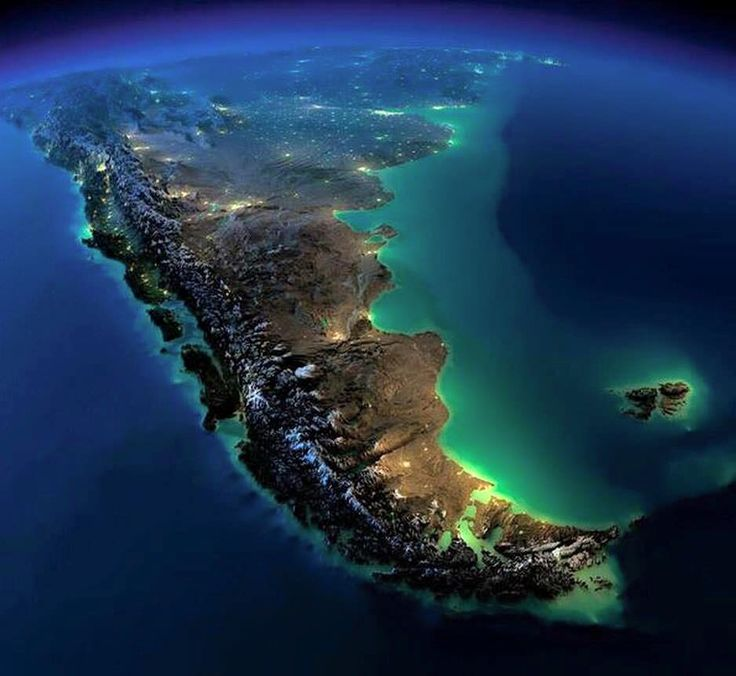

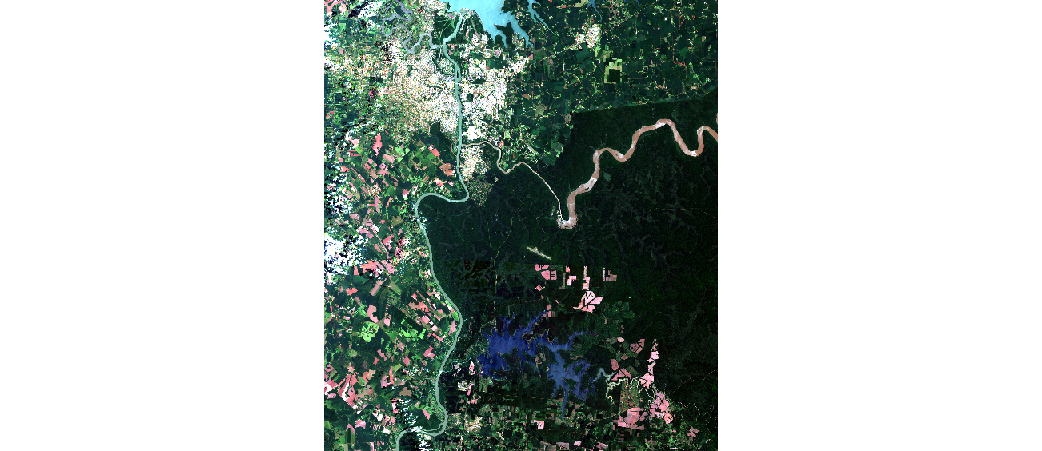

In [2]:
# 2a)
# mostramos la imagen 

img = Image.open('/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/argentina.jpg')
img2 = Image.open('/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/Landsat8/LC08_224-078_2018-01-05_RGB.png')
display(img)
display(img2)

In [4]:
# 2b)
# Guardamos la imagen en img en un nuevo archivo
img.save('/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/argentina2.jpg')

In [5]:
# 2c)
# Acá verificamos que la imagen satelital es de 4 canales, siendo el 4to el Alpha (transparencia). Algo comun en las imágenes png. 
# una imagen JPG tiene 3 canales.
print("Imagen 1 es: ", img.mode) 
print("Imagen 2 es: ", img2.mode)

# Obtener el valor de un pixel en la imagen
pixel_img = img.getpixel((200, 150))
pixel_img2 = img2.getpixel((353, 353))
print(f"Valor del pixel en (353, 353): {pixel_img}")
print(f"Valor del pixel en (200, 150): {pixel_img2}")

# Esto nos devuelve el valor de la tupla para cada una de las posiciones. Podemos ver que para la imagen 1 es de 3 bandas (RGB) y para la imagen 2 es de 4 bandas (RGBA).

Imagen 1 es:  RGB
Imagen 2 es:  RGBA
Valor del pixel en (353, 353): (64, 98, 144)
Valor del pixel en (200, 150): (104, 162, 97, 255)


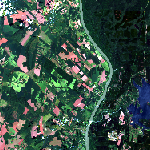

In [30]:
# 2d) Copiar una parte de la imagen en otra imagen nueva
img_cortada = img2.crop((350, 250, 500, 400)).convert("RGB")  # (left, upper, right, lower)
display(img_cortada)

In [32]:
#2e)
# Guardar la imagen cortada en un nuevo archivo
img_cortada.save('/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/imagen_cortada.png')

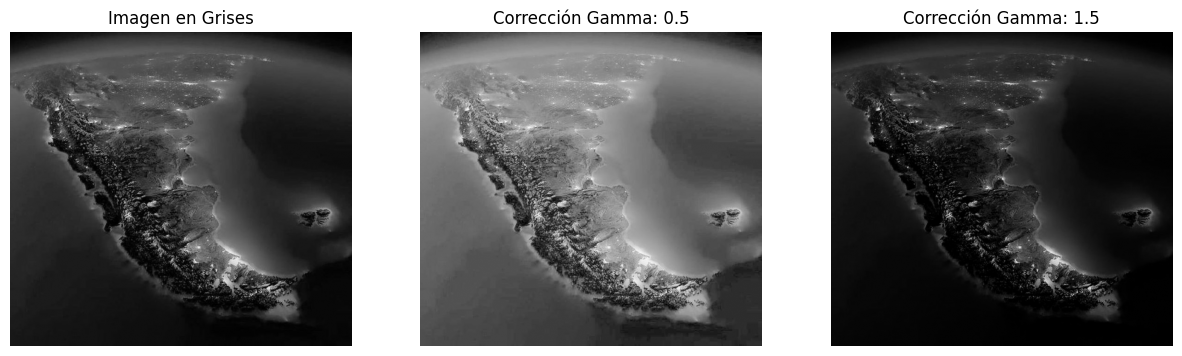

In [ ]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# usamos convert para pasar la imagen 1 a niveles de gris.
img_gris = img.convert("L")

# definimos una función de corrección gamma.
# metemos la imagen en un array de numpy, aplicamos la corrección gamma y volvemos a convertir a imagen.
def gamma_correction(img, gamma):
    img_array = np.array(img)
    # normalizamos, aplicamos gama y reescalamos nuevamente para mostrarlo. Por que la corrección gamma se hace sobre valores entre 0 y 1.
    out = (img_array / 255) ** (gamma) * 255 # esta es la corrección 
    return Image.fromarray(np.uint8(out)) # hay que convertir a uint8 para que sea una imagen válida
valores_gamma = [0.5, 1.5]
plt.figure(figsize=(15, 5))
plt.subplot(1, len(valores_gamma) + 1, 1)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en Grises')
plt.axis('off')
for i, gamma in enumerate(valores_gamma):
    img_gamma = gamma_correction(img_gris, gamma)
    plt.subplot(1, len(valores_gamma) + 1, i + 2)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f'Corrección Gamma: {gamma}')
    plt.axis('off')

plt.show()